In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sc


In [6]:
df = pd.read_csv("bbc_news_dataset.csv")

In [7]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [9]:
df.shape

(1490, 3)

In [10]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [11]:
X= df['Text']
y= df['Category']

In [12]:
category_names = df['Category'].unique()
category_names

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [13]:
value_counts = df['Category'].value_counts()
value_counts

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

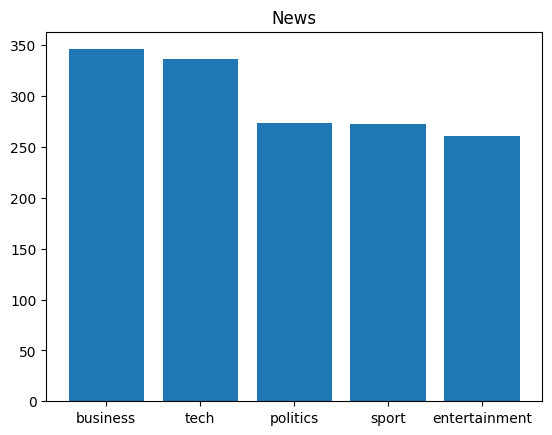

In [14]:
plt.plot(figsize=(6,4))
plt.bar(x=category_names, height=value_counts)
plt.title("News")
plt.savefig('news.png')
plt.show()

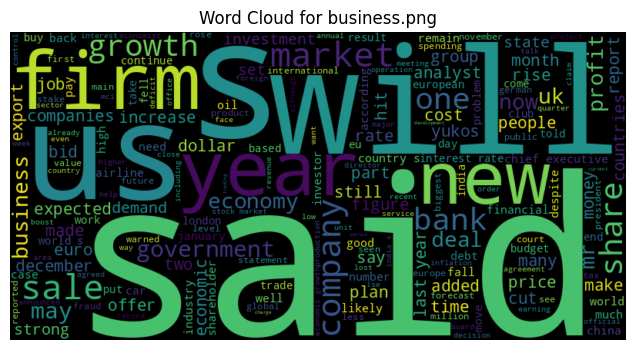

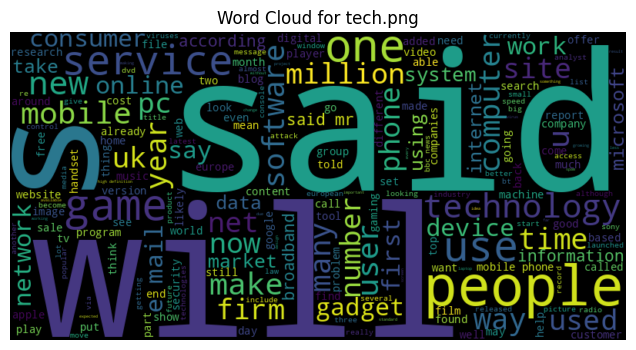

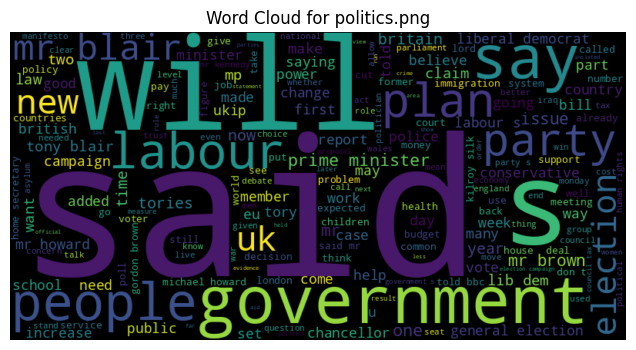

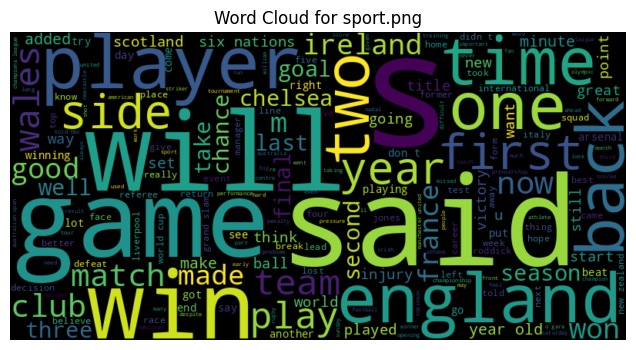

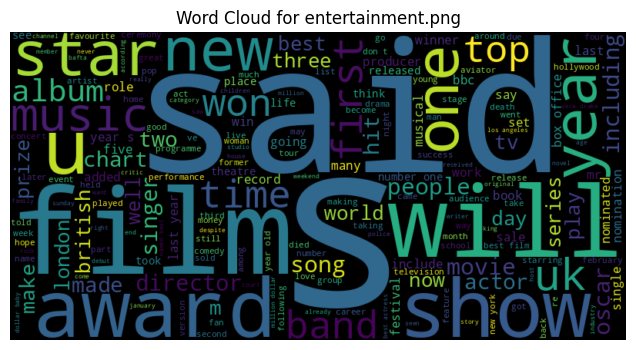

In [15]:
from wordcloud import WordCloud
for category in category_names:
    text = ''.join(df[df['Category'] == category]['Text'].values)
    wc = WordCloud(width=800, height=400).generate(text=text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}.png")
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9563758389261745


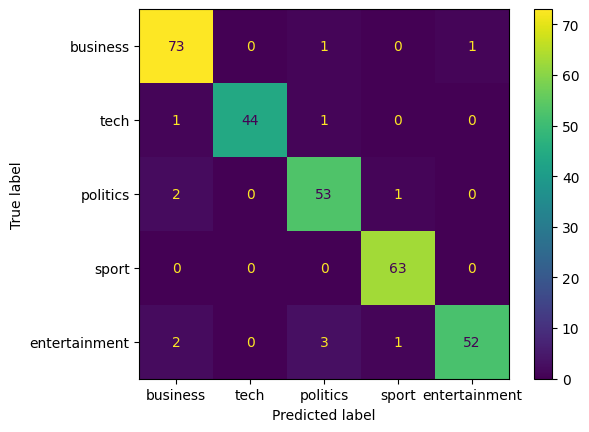

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
cm_plot.plot()
plt.savefig("confusion_matrixnews.png")

In [20]:
texts = ["Messi is the GOAT, said by PM Nandrendra Modi but KP oli refuses to agree goat debate."]
predctions = model.predict(texts)
for text, prediction in zip(texts, predctions):
   print(f"Text: {text[:20]}... | Predicted : {prediction}")


Text: Messi is the GOAT, s... | Predicted : politics


In [21]:
import joblib
joblib.dump(model, 'model.joblib')
print("sucess")

sucess
